# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Gathering Data </a></li>
    <li><a href="#assessing">Assessing Data</a></li>
        <li><a href="#assessingsum">Assessing Summary</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> Real-world data rarely comes clean. Using Python and its libraries, the aim of this project is gather data from a variety of sources and in a variety of formats, assess its quality and tidiness and then clean it. This is called data wrangling. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through stunning analyses and visualizations using Python (and its libraries for data analysis).


> In the this project I am going to gather and analyze data from `WeRateDogs` Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>. Data will be gathered through manual download, programmatical downloading and over twitter API. After that I am going to assess the data, define the issues found during the assessment and clean the data to get a final cleaned master dataset which I will analyze to produce interesting and stunning vizualizations. 

<a id='sources'></a>
## Data Sources


>1. **Name:** WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv">Udacity</a></li>    

>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

>2. **Name:** Tweet image predictions (image_predictions.tsv)</li>
><ul>   
>    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">Udacity</a></li>     
>    <li><b>Method of gathering:</b> Programmatical download using Python requests library</li>
></ul>

>3. **Name:** Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDog</a></li>    
>    <li><b>Method of gathering:</b> Twitter API via Tweepy</li>
></ul>


In [1]:
#Let's import all packages I will use in this project
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce
from datetime import datetime
import json 
import re

# pandas settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

<a id='gathering'></a>
## Gathering Data

#### 1. WeRateDogs Twitter Archive (twitter-archive-enhanced-2.csv)

> The file "twitter_archive_enhanced-2.csv" was downloaded manually from Udacity resources

In [2]:
# load twitter archive data into pandas dataframe
df = pd.read_csv("twitter-archive-enhanced-2.csv")

#Let's take a look at the first three rows
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


#### 2. Tweet image predictions (image_predictions.tsv)

The tweet image predictions: i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and will be downloaded programmatically using the Pthon requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [3]:
# let's download image_predictions.tsv programatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)


In [4]:
# Let's load image predictions data into pandas dataframe
image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')

# display few five rows
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Gathering data from twitter API (tweet_json.txt)

To gather the data from the Twitter API I created a Twitter developer account and gathered the data via tweepy. This additional data is in a new file  "tweet_json.txt". 

This file contains tweet id, favorite count and retweet count. I used Tweepy to query Twitter's API for this additional data beyond the data included in the WeRateDogs Twitter archive. This additional data includes retweet count and favorite count.


In [5]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'gTk5y3dDlWatjO9q1BidA8pl2'
# consumer_secret = 'Oumxg4Ex73jkoLvspvTKQbsYkeLT1xgMCC9McMNfMuBXjX9aif'
# access_token = '790549754522570753-lDYG528vWoH3RJngde3SK1ntIeoJO38'
# access_secret = 'lkBK5QbWHmoD3TgkaicUsEztaDBbKSVqgc2vtCzBX3kRI'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)


# tweet_ids = df.tweet_id.values
# len(tweet_ids)
# #get all the twitter ids in the df
# twitter_ids = list(df.tweet_id.unique())



# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
#Reading the data from the tweet_json.txt
twitter_api_data = [] #declaring a list for storing lines
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    for line in json_file:
        twitter_api_data.append(json.loads(line))

#Gathering data from the tweet_json file
retweet_favorite_list = []
for each_dict in twitter_api_data:
        tweet_id = each_dict['id']
        favorite_count = each_dict['favorite_count']
        retweet_count = each_dict['retweet_count']
        retweet_favorite_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                            })

In [7]:
#Creating a Data Frame basing on the list of elements gathering form tweet_json2 file
api_df = pd.DataFrame(retweet_favorite_list, columns = ['tweet_id', 'favorite_count','retweet_count'])

# display the first 3 rows
api_df.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33777,6991
1,892177421306343426,29293,5293
2,891815181378084864,22031,3471


## Assessing Data
In this step I will assess the data we gathered above and try to detect some common data issues like: quality issue and tidiness issue.
I will employ both both visual and programmatical ways of assessing data . Let us now assess data visually and as well as programmatically using pandas to identify quality and tidiness issuesin our data .

### df (Twitter archive data)

Let's first look for missing data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

We can see that there is a lot of missing data in the reply and the retweeted columns. Since we only want original posts with images, we have to drop these columns later. The missing data in the "expanded_urls" column will also be dropped alongside.

In [10]:
#Check data by visual assessment
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Perry. He's an Augustus Gloopster. Very condescending. Makes up for it with the sneaky tongue slip. 11/10 https://t.co/JVvIrUmTkR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684902183876321280/photo/1,11,10,Perry,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jersey. He likes to watch movies, but only if you watch with him. Enjoys horror films like The Bababork and H*ckraiser. 13/10 https://t.co/jvSNASweNb",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/862457590147678208/photo/1,https://twitter.com/dog_rates/status/862457590147678208/photo/1,https://twitter.com/dog_rates/status/862457590147678208/photo/1",13,10,Jersey,None,None,None,None


From the visual assessment we can see that:
- the source contains HTML code which are not necessaary
- not all tweets could be classified as doggo, floofer, pupper or puppo and the columns contain "None"
- there is "None" value in the name column

- timestamp - columns should be datetime objects not string

Now let's see how many wrong names we can find.

In [11]:
#let's check for wrong names in the name columns
df.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

We can see, the name column contains wrong names like "None", "a", "the", "an". We shall remove those in the cleaning section later on

Now let's check for duplicates

In [12]:
sum(df.duplicated())

0

There are no duplicates in this data, this implies that the number of unique tweet_ids should be the length of the df. Lets check this below

In [13]:
df.tweet_id.nunique() == df.shape[0]

True

In [14]:
# check number of replies
np.isfinite(df.in_reply_to_status_id).sum()

78

In [15]:
# check number of retweets
np.isfinite(df.retweeted_status_id).sum()

181

In [16]:
# check name of dog
df.name.value_counts().head(60)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Reginald      4
Maggie        4
Luna          4
Maddie        4
Dexter        4
Jerry         4
Carl          4
Ruby          4
Riley         4
Clark         4
Name: name, dtype: int64

There are irrelevant names such as 'None', 'a', 'an'

In [17]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    df[category] = df[category].apply(lambda x: 0 if x == 'None' else 1)

df['number_categories'] = df.loc[:,categories].sum(axis = 1)

In [18]:
# dogs categories
df['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

>- Clearly we can see that some dogs have more than one category assigned.

Now let's take a look at the ratings. By what we have seen so far, it looks like the ratings have always a format of 13/10 or 12/10 and so on. So we expect a numerator > 10 and denominator = 10.

In [19]:
# check rating denominator
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
# check ratings with denominator greather than 10
df[df.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [21]:
# check rating numerator
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

We can see that there is a wide range of values for rating_numerator, with a maximum of 1776.

In [22]:
#check for any float ratings in the text column

with pd.option_context('max_colwidth', 200):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

C:\Users\User\AppData\Local\Temp/ipykernel_6644/1178108513.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


>- We can see clearly that some ratings were extracted incorrectly!

In [23]:
# check expanded urls
df[~df.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
126,Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1"
342,@docmisterio account started on 11/15/15,NaN
444,Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv,http://us.blastingnews.com/news/2017/01/200-dogs-saved-from-south-korean-dog-meat-industry-001385441.html?sbdht=_pM1QUzk3wsfscF9XF2WEd9KoWDpsQlMUjfh1HxxUq0u5mMbiu2B0kw2_


>- There are expanded urls which contain more than one url address.

In [24]:
# check for two or more urls in the expanded urls
df[df.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

>- We have 639 expanded urls which contain more than one url address.

#### Let us try to assess further data with high rating_numerator and low rating_numerator

In [25]:
print(df.query("rating_numerator == 1776").text)

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object


In [26]:
print(df.query("rating_numerator == 1").text)

605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1446                                           After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me
1869                       What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
1940                                                        The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
2038         After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes
2091        Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
2261    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not e

The entry with index 605 shows, that these tweets contain pictures that don't contain any dogs. Also in the entry with index 2335 the rating got extracted wrongly (misinterpreted the 1/2 of 3 1/2 as the rating).

In [27]:
print(df.query("rating_numerator == 0").text)

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object


No clear dog photos again. Let's make the same check for the denominator.

In [28]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [29]:
print(df.query("rating_denominator == 170").text)

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object


In [30]:
print(df.query("rating_denominator == 0").text)

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


In [31]:
print(df.query("rating_denominator == 7").text)

516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object


The same problems as for the numerator. Multiple Dogs or multiple occurences of the pattern \d+/\d+. Lets extract this by our self and see what we get.

Now let's create a copy of the twitter archive df dataframe for further assessment. 

In [32]:
df_twitter = df.copy()

In [33]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

In [34]:
df_twitter["rating"] = df_twitter.text.str.extract(pattern, expand = True)[0]

df_twitter[['num', 'denom']] = df_twitter['rating'].str.split('/', n=1, expand=True)

In [35]:
df_twitter.rating_numerator = df_twitter.rating_numerator.astype("str")
df_twitter.rating_denominator = df_twitter.rating_denominator.astype("str")

In [36]:
#look for differences in the original numerator and the newe extract
df_twitter["check_num"] = df_twitter[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)
df_twitter["check_num"]

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: check_num, Length: 2356, dtype: bool

In [37]:
df_twitter.check_num.value_counts()

True     2349
False       7
Name: check_num, dtype: int64

In [38]:
df_twitter.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


These are the differences we found by extracting the first occurrence of the pattern. These ratings got transformed to integers and are therefore wrong.

In [39]:
df_twitter[["rating_numerator", "num", "check_num"]].sample(15)

,rating_numerator,num,check_num
2194,11,11,True
1584,11,11,True
1831,9,9,True
2242,5,5,True
571,12,12,True
1719,12,12,True
2082,10,10,True
586,13,13,True
1755,11,11,True
739,12,12,True


Let's repeat this for the denominator.

In [40]:
df_twitter["check_denom"] = df_twitter[["rating_denominator", "denom"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [41]:
df_twitter.check_denom.value_counts()

True     2355
False       1
Name: check_denom, dtype: int64

In [42]:
df_twitter.query("check_denom == False")[["rating_denominator", "denom","check_denom"]] #problem with integer, maybe also floats?

,rating_denominator,denom,check_denom
313,0,00,False


This seems like it is no problem that we have to worry about.

In [43]:
df_twitter[["rating_denominator", "denom", "check_denom"]].sample(5)

,rating_denominator,denom,check_denom
1345,10,10,True
858,10,10,True
1365,10,10,True
297,10,10,True
217,10,10,True


Now we should assess how often there are multiple occurences of the "rating pattern" in one tweet.

In [44]:
df_twitter["count"] = df_twitter.text.str.count(pattern)

In [45]:
df_twitter["count"].value_counts()

1    2323
2      32
3       1
Name: count, dtype: int64

In [46]:
#show the full text
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

df_twitter[["text", "count"]].query("count != 1")

,text,count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2


We can see that:
- this data contains retweets (as mentioned before)
- sometimes there are multiple dogs/cats or else in one picture
- some of these ratings are not clear

#### image_prediction_df

Let's also begin with the missing data first.

In [47]:
# display sample of data
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
794,690932576555528194,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True
1599,799422933579902976,https://pbs.twimg.com/media/Cxge6AdUQAAvXLB.jpg,1,miniature_pinscher,0.583630,True,redbone,0.276095,True,toy_terrier,0.018550,True


In [48]:
# Display a summary of a DataFrame
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There is no null value in the data. Let's confirm this below

In [49]:
# check jpg_url to confirm if it contains only jpg and png images
image_prediction_df[~image_prediction_df.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [50]:
image_prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [51]:
# check dog predictions
image_prediction_df.p1_dog.count()

2075

Looks fine. Now the visual assessment:

In [52]:
image_prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True
1087,718939241951195136,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1,Pembroke,0.766327,True,Cardigan,0.222126,True,toilet_tissue,0.006757,False
147,668631377374486528,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1,miniature_schnauzer,0.904549,True,Australian_terrier,0.022529,True,silky_terrier,0.015243,True
89,667534815156183040,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1,Pembroke,0.435254,True,Cardigan,0.307407,True,cocker_spaniel,0.033158,True
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,Chihuahua,0.438054,True,kelpie,0.149706,True,Pembroke,0.096480,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True
1654,810254108431155201,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,1,Staffordshire_bullterrier,0.292556,True,American_Staffordshire_terrier,0.261233,True,Border_terrier,0.062375,True
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True


We can see that:
- there is an underscore instead of a whitespace between the words
- the predictions are sometimes lowercase, sometimes uppercase
- there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

Let's check for duplicates

The best way to find duplicates is to look at the jpg - url. If there are value counts > 1, then this data contains duplicates/retweets.

In [53]:
image_prediction_df.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
Name: jpg_url, dtype: int64

The data clearly contains some retweets

In [54]:
# Check jpg_url for duplicates
sum(image_prediction_df.jpg_url.duplicated())


66

We only want tweets with pictures which contain dogs. Let's see if there are pictures, for which the ML - Algorithm didn't predict any dogs.

In [55]:
image_prediction_df.query("p1_dog == False and p2_dog == False and p3_dog == False").head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


In [56]:
image_prediction_df.query("p1_dog == False and (p2_dog == True or p3_dog == True)").head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False


After checking some of these pictures it it's clear, that sometimes the doggos are in the background or the pictures doesn't contain any dogs at all.

### Assess: Twitter API Data

In [57]:
# display sample of data
api_df.sample(3)

,tweet_id,favorite_count,retweet_count
2311,666094000022159362,142,63
2062,670782429121134593,1348,658
421,819952236453363712,5016,1082


In [58]:
# print a summary of a DataFrame
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   object
 1   favorite_count  2326 non-null   int64 
 2   retweet_count   2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [59]:
# check if ids are unique
api_df.index.is_unique

True

Overall this dataset looks good. There is no missing data.

<a id='assessingsum'></a>
### Assessing Summary

#### Quality
##### `df` table

- some of the dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo" and contain all "None" instead
- some of the gathered tweets are replies and should be removed.
- some of the gathered tweets are retweets.
- float ratings have been incorrectly read from the text of tweet.
- we have 639 expanded urls which contain more than one url address.
- some of the dog names are not correct (None, an, by, a, ...)
- contains retweets and should be removed
- some of the ratings are not correctly extracted (mostly if there are >1 entries with the pattern "(\d+(\.\d+)?\/\d+(\.\d+)?)"
- also transforming the ratings to integer created some mistakes (there are also floats)
- the source column contains html code
- Delete columns that won't be used for analysis.
- The timestamp has an incorrect datatype - is string, should be datetime object.
- some dogs have more than one category assigned.
- Correct denominators other than 10.
- float ratings have been incorrectly read from the text of tweet.


##### `image_pridiction_df table

- contains retweets (duplicated rows in column `jpg_url`)
- there are pictures in this table that are not dogs
- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.
- column names are confusing and do not give much information about the content.
- dog breeds contain underscores, and have different case formatting.
- 66 jpg_url duplicates were found.



##### `df_api` table
- Overall this dataset looks good.

#### Tidiness
##### `df` table
- the columns `doggo`, `floofer`,`pupper` and `puppo` are not easy to analyze and should be in one column

##### `image_pridiction_df ` table
- dataset should be merged with the twitter archive df dataset.
- the prediction and confidence columns should be reduced to two columns - one for the prediction with the highest confidence (dog)

##### `api_df` table
- None

##### `all` tables

- All three tables share the column `tweet_id` and should be merged together on `tweet_id`.

### Cleaning Data
Let's use pandas to clean the quality and tidiness issues identified in the Assessing Data section.

Cleaning steps:

<ol>
    <li>Merge the tables together</li>
    <li>Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos</li>
    <li>Clean the datatypes of the columns</li>
    <li>Clean the wrong numerators - the floats on the one hand (replacement), the ones with multiple occurence of the pattern on the other (drop)</li>
    <li>Extract the source from html code</li>
    <li>Split the text range into two separate columns</li>
    <li>Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column</li>
    <li>Remove the wrong names of name column</li>
    <li>Reduce the prediction columns into two - breed and conf</li>
    <li>Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase</li>
</ol>

**1. Merge the tables together**

In [60]:
# Before we merge the tables let's change the datatype of the tweet_id of the api_df to int
api_df.tweet_id= api_df.tweet_id.astype("int64")

In [61]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   favorite_count  2326 non-null   int64
 2   retweet_count   2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [62]:

#left merging df and image_prediction_df on tweet_id
df_master1 = pd.merge(df_twitter, image_prediction_df, how = 'left', on = ['tweet_id'])

#left merging df_master1 and api_df on tweet_id 
df_master = pd.merge(df_master1, api_df, how = 'left', on = ['tweet_id'])

In [63]:
df_master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0,13/10,13,10,True,True,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33777.0,6991.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0,13/10,13,10,True,True,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29293.0,5293.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0,12/10,12,10,True,True,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22031.0,3471.0


In [64]:
# let's make a copy of the dataset
df_master_clean = df_master.copy()

**2. Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos**

Let's remove the replies, retweets and the tweets withouth an image displaying a dog, because we only want original tweets with images. 

In [65]:
#we only want the rows without an entry in "retweeted_status_id" in our master dataframe
df_master_clean = df_master_clean[df_master_clean["retweeted_status_id"].isnull()]


In [66]:
# lets check our dataset
print(sum(df_master_clean.retweeted_status_user_id.value_counts()))

0


In [67]:
for i,v in enumerate(df_master_clean.columns):
    print(i,v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo
17 number_categories
18 rating
19 num
20 denom
21 check_num
22 check_denom
23 count
24 jpg_url
25 img_num
26 p1
27 p1_conf
28 p1_dog
29 p2
30 p2_conf
31 p2_dog
32 p3
33 p3_conf
34 p3_dog
35 favorite_count
36 retweet_count


In [68]:
#same as for the retweets, we only want the rows without an entry in "in_reply_to_status_id"
df_master_clean = df_master_clean[df_master_clean.in_reply_to_status_id.isnull()]

#lets check our dataset
print(sum(df_master_clean.in_reply_to_status_id.value_counts()))


0


In [69]:
#drop the columns that we don't neeed
df_master_clean = df_master_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], axis = 1)

In [70]:
#Let's check the columns again
df_master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'number_categories', 'rating', 'num', 'denom', 'check_num', 'check_denom', 'count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'], dtype='object')

Now we want to take a look on the "jpg_url" column and drop all the rows, which have NAN  values - since these are the ones without an image.

In [71]:
df_master_clean.dropna(subset = ["jpg_url"], inplace = True)

The last step here is to drop the rows which contain images, that are not displaying any dogs (relying on the top three predictions of the ML algorithm).

In [72]:
df_master_clean.drop(df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

In [73]:
df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [74]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1666 non-null   int64  
 1   timestamp           1666 non-null   object 
 2   source              1666 non-null   object 
 3   text                1666 non-null   object 
 4   expanded_urls       1666 non-null   object 
 5   rating_numerator    1666 non-null   object 
 6   rating_denominator  1666 non-null   object 
 7   name                1666 non-null   object 
 8   doggo               1666 non-null   int64  
 9   floofer             1666 non-null   int64  
 10  pupper              1666 non-null   int64  
 11  puppo               1666 non-null   int64  
 12  number_categories   1666 non-null   int64  
 13  rating              1666 non-null   object 
 14  num                 1666 non-null   object 
 15  denom               1666 non-null   object 
 16  check_

**3. Clean the datatypes of the columns**

In [75]:
df_master_clean["tweet_id"] = df_master_clean["tweet_id"].astype("str")

In [76]:
# Let's drop rows with null values in retweet_count and favorite_count
df_master_clean.dropna(inplace=True)


In [77]:
df_master_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0,13/10,13,10,True,True,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29293.0,5293.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0,12/10,12,10,True,True,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22031.0,3471.0


In [78]:
#change the timestamp from str to datetime object
df_master_clean["timestamp"] = pd.to_datetime(df_master_clean.timestamp)

In [79]:
# Lets change the data type to int
for x in ["retweet_count", "favorite_count", "img_num"]:
    df_master_clean[x] = df_master_clean[x].astype("int64")

In [80]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   object             
 6   rating_denominator  1657 non-null   object             
 7   name                1657 non-null   object             
 8   doggo               1657 non-null   int64              
 9   floofer             1657 non-null   int64              
 10  pupper              1657 non-null   int64              
 11  puppo               1657 non-null   int64              
 12  number_categories   1657 non-null 

**4. Clean the wrong numerators - the floats on the one hand, the ones with multiple occurence of the pattern on the other**

While assessing the dataset, we found out, that floating numbers got transformed into integers, which lead to loss of information.

In [81]:
df_master_clean.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
695,75,9.75,False
763,27,11.27,False
1712,26,11.26,False


We dropped a lot of rows, so we cannot be sure that all of these problems are still in this dataset, so we will extract it again.

In [82]:
pattern = "(\d+\.\d+\/\d+)"

df_master_clean.text.str.extract(pattern, expand = True)[0].dropna()

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [83]:
#get the right numerator out of the string
df_num_clean = df_master_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]

In [84]:
df_num_clean

45       13.5
695      9.75
763     11.27
1712    11.26
Name: 0, dtype: object

In [85]:
#get the index of the wrong data
df_num_clean_index = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype("float64")

Now that we have our data together, we can impute these values and clean this data.

In [86]:
#transform the datatypes to float
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype("float64")
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype("float64")
#impute the data
df_master_clean.loc[df_num_clean_index, "rating_numerator"] = df_num_clean_values
df_master_clean.loc[df_num_clean_index].rating_numerator

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

We also have the problem, that there can be multiple occurrences of the pattern. The reason for this is - most of the time - the display of two or more dogs in an image. For this cases we could add the ratings up, because the author of the Twitter account did this in one case that we found. Or we could build the average rating per each picture. For now, we are going to drop them out of the dataframe.

In [87]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

#get the index of the rows which contains the pattern more than once
pattern_clean_index = df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [88]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   float64            
 6   rating_denominator  1657 non-null   float64            
 7   name                1657 non-null   object             
 8   doggo               1657 non-null   int64              
 9   floofer             1657 non-null   int64              
 10  pupper              1657 non-null   int64              
 11  puppo               1657 non-null   int64              
 12  number_categories   1657 non-null 

In [89]:
#no more occurrences of the mentioned problem are left
print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


**5. Extract the source from html code**

Right now the source column is not giving us any useful information while looking at it. Because the relevant information is always between two "> <", the information will be easy to extract.

In [90]:
df_master_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,0,0,0,0,0,13/10,13,10,True,True,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29293,5293
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,0,0,0,0,0,12/10,12,10,True,True,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22031,3471


In [91]:
#https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
df_master_clean.source = df_master_clean.source.str.extract("\>(.*?)\<", expand = True)

In [92]:
df_master_clean.iloc[:,:3].head(2)

,tweet_id,timestamp,source
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone


In [93]:
df_master_clean.source.value_counts()

Twitter for iPhone    1627
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

**7. Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column**

We want to reduce the columns into one for an easier analysis. For that we have to remove the None with "" at first to concat the columns together and afterswards with np.nan, so we could easily exclude these rows from a specific analysis.

In [94]:
# read dog types from text column
for index, column in df_master_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(df_master_clean.loc[index, 'text']).lower():
            df_master_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
df_master_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)
                         

In [95]:
df_master_clean.dog_type.value_counts()

Pupper     184
Doggo       65
Puppo       25
Floofer      8
Name: dog_type, dtype: int64

**8. Remove the wrong names of name column**

Here we will also replace the wrong names with np.nan.

In [96]:
for x in ["None", "a", "by", "the"]:
    df_master_clean["name"].replace(x, np.nan, inplace = True)

In [97]:
df_master_clean.name.value_counts()

Cooper        9
Charlie       9
Tucker        9
Oliver        9
Lucy          9
             ..
Philbert      1
Rupert        1
Brudge        1
Shadoe        1
Christoper    1
Name: name, Length: 846, dtype: int64

In [98]:
df_master_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,0,13/10,13,10,True,True,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29293,5293,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,0,12/10,12,10,True,True,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22031,3471,NaN


**9. Reduce the prediction columns into two - breed and conf**

In the next step we want to reduce the prediction columns into two - breed and confidence. The columns are already sorted by confidence. We will take the most likely prediction for each row which is supposed to be a dog.

In [99]:
df_master_clean.query("p2_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type


In [100]:
df_master_clean.query("p3_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type


In [101]:
df_master_clean.query("p3_conf > p2_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,rating,num,denom,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type


The order is correct.

In [102]:
#extract the most likely prediction which is a dog
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_master_clean["breed"] = df_master_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_master_clean["conf"] = df_master_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [103]:
df_master_clean.iloc[:, 12:]

,check_num,check_denom,count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,breed,conf
1,True,True,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29293,5293,NaN,Chihuahua,0.323581
2,True,True,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22031,3471,NaN,Chihuahua,0.716012
3,True,True,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36888,7216,NaN,Labrador_retriever,0.168086
4,True,True,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35273,7743,NaN,basset,0.555712
5,True,True,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,17787,2595,NaN,Chesapeake_Bay_retriever,0.425595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,True,True,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,88,36,NaN,miniature_pinscher,0.560311
2352,True,True,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,247,115,NaN,Rhodesian_ridgeback,0.408143
2353,True,True,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,100,36,NaN,German_shepherd,0.596461
2354,True,True,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,112,39,NaN,redbone,0.506826


In [104]:
#drop the reduced columns
df_master_clean.drop(df_master_clean.columns[12:20], inplace = True, axis = 1)

In [105]:
df_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,rating,num,denom,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,breed,conf
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,0,13/10,13,10,Pekinese,0.090647,True,papillon,0.068957,True,29293,5293,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,0,12/10,12,10,malamute,0.078253,True,kelpie,0.031379,True,22031,3471,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,0,13/10,13,10,Labrador_retriever,0.168086,True,spatula,0.040836,False,36888,7216,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,0,12/10,12,10,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35273,7743,NaN,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,0,13/10,13,10,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,17787,2595,NaN,Chesapeake_Bay_retriever,0.425595


**10. Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase**

Now that we have our reduced column, we have to clean it for consistency.

In [106]:
#replace "_" with " "
df_master_clean.breed = df_master_clean.breed.str.replace("_", " ")

In [107]:
df_master_clean.breed

1                      Chihuahua
2                      Chihuahua
3             Labrador retriever
4                         basset
5       Chesapeake Bay retriever
                  ...           
2351          miniature pinscher
2352         Rhodesian ridgeback
2353             German shepherd
2354                     redbone
2355      Welsh springer spaniel
Name: breed, Length: 1657, dtype: object

In [108]:
#https://stackoverflow.com/questions/22245171/how-to-lowercase-a-python-dataframe-string-column-if-it-has-missing-values
#lower the strings
df_master_clean.breed = df_master_clean.breed.str.lower()

In [109]:
df_master_clean.breed.value_counts().head(10)

golden retriever      156
labrador retriever    103
pembroke               94
chihuahua              90
pug                    62
toy poodle             49
chow                   48
samoyed                41
pomeranian             41
malamute               32
Name: breed, dtype: int64

In [110]:
#reset index to match with the real amount of rows
df_master_clean.reset_index(drop = True, inplace = True)

In [111]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   float64            
 6   rating_denominator  1657 non-null   float64            
 7   name                1205 non-null   object             
 8   number_categories   1657 non-null   int64              
 9   rating              1657 non-null   object             
 10  num                 1657 non-null   object             
 11  denom               1657 non-null   object             
 12  p2                  1657 non-null 

In [112]:
df_master_clean[["breed", "conf"]].head(3)

,breed,conf
0,chihuahua,0.323581
1,chihuahua,0.716012
2,labrador retriever,0.168086


In [113]:
#save the data to a *.csv file
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

### 1. Insight one
What is most popular breed dog?

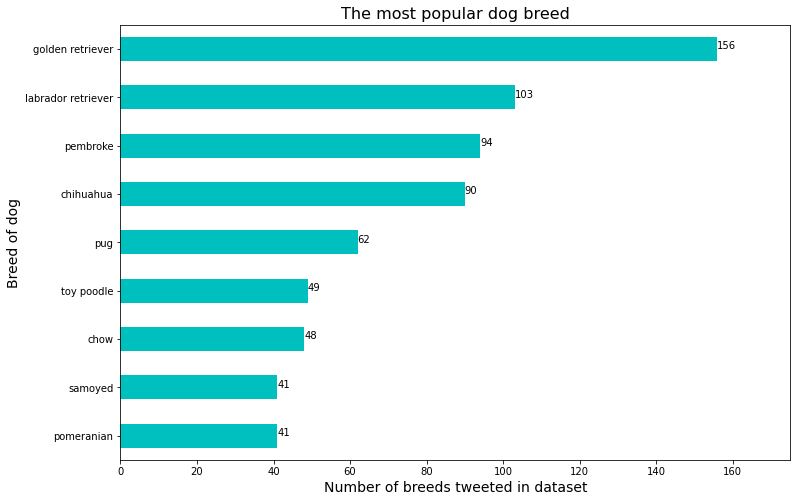

In [114]:
# grouping by breed_dog column and return the number of items in this grouped dataframe by dog breed 
popular_breed = df_master_clean.groupby('breed').filter(lambda x: len(x) >= 40)

# plotting the value counting ascending of most popular dog breed
count_breed = popular_breed.breed.value_counts(ascending = True)
count_breed.plot(kind = 'barh', figsize = [12, 8], color='c')

#display values for each bar
for index, value in enumerate(count_breed):
    plt.text(value, index, str(value))
    
plt.title('The most popular dog breed', fontsize = 16)
plt.xlabel('Number of breeds tweeted in dataset', fontsize = 14)
plt.ylabel('Breed of dog', fontsize = 14)
plt.xlim(0, 175) # limiting the X axis on 175 

# exporting the horizontal bar plot on png format 
plt.savefig('popular_breed.png', bbox_inches='tight');

>- We can see that golden retriver is the most popular dog breed

### Insight two
Which dog breed got the most retweet?

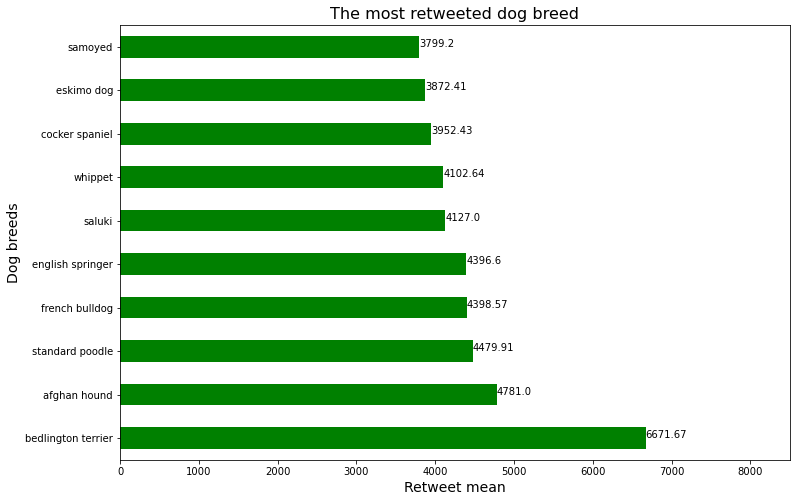

In [119]:
# choose the 10 hight retweeted breed dogs 
high_retweet = df_master_clean.groupby('breed').retweet_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_retweet.plot(kind='barh', figsize=[12, 8], color="g")

# adding the text values to each bar in chart 
for index, value in enumerate(high_retweet):
    plt.text(value, index, float(value))

plt.title('The most retweeted dog breed', fontsize = 16) 
plt.xlabel('Retweet mean', fontsize = 14)
plt.ylabel('Dog breeds', fontsize = 14)
plt.xlim(0, 8500) # limiting the X-axis on 8500 

# exporting the bar plot on png format 
plt.savefig('high_retweet_breed.png', bbox_inches='tight');

>- bedlington is the dog breed with the most retweet

### Insight three
The dog breed get the highest favorite count

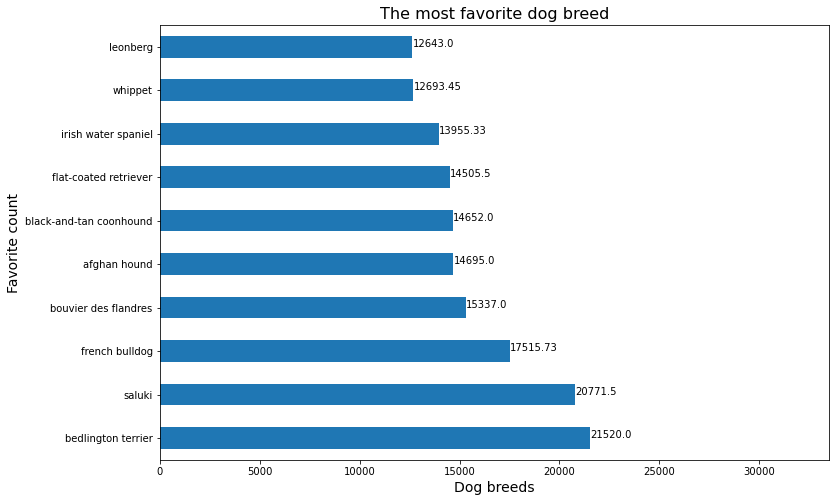

In [116]:
# choose the 10 hight favorited breed dogs 
high_favorite = df_master_clean.groupby('breed').favorite_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_favorite.plot(kind='barh', figsize=[12, 8])

# adding the text values to each bar in chart
for index, value in enumerate(high_favorite):
    plt.text(value, index, float(value))
    
    
plt.title('The most favorite dog breed', fontsize = 16)
plt.xlabel('Dog breeds', fontsize = 14)
plt.ylabel('Favorite count', fontsize = 14)
plt.xlim(0, 33500) # limiting the Y-axis on 33500 

# exporting the bar plot on png format 
plt.savefig('high_favorite_breed.png', bbox_inches='tight');

 >- We can see, that the most favorited dog breed for @dog_rates page users is Bedlington terrier

## Insight four

The correlation between favorite count and retweet count for breed dogs

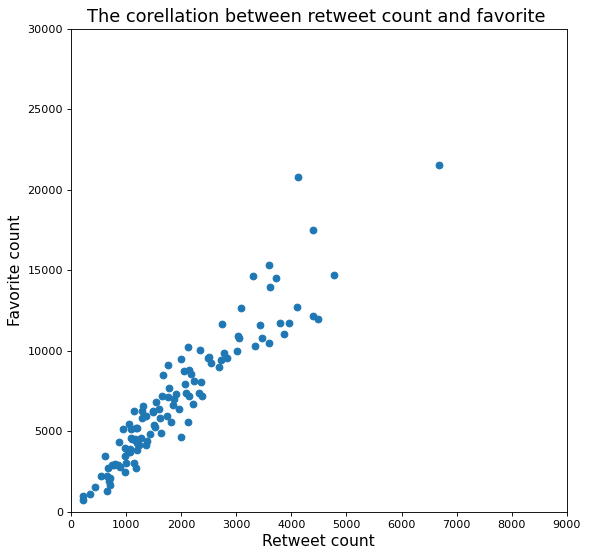

In [117]:
# getting the mean of retweet by breed dog 
high_retweet2 = df_master_clean.groupby('breed').retweet_count.mean()

# getting the mean of favorite by breed dog 
high_favorite2 = df_master_clean.groupby('breed').favorite_count.mean()

# set up the figure size of plotting 
plt.figure(figsize=(8, 8), dpi=80)

#plotting the scatter chart of two variables
plt.scatter(x=high_retweet2, y=high_favorite2)

plt.title('The corellation between retweet count and favorite ', fontsize = 16)
plt.xlabel('Retweet count', fontsize = 14)
plt.ylabel('Favorite count', fontsize = 14)
plt.xlim(0, 9000) # limiting the X axis on 9000 
plt.ylim(0, 30000) # limiting the  axis on 30000 

# exporting the bar plot on png format 
plt.savefig('retweet_favorite_correlation.png', bbox_inches='tight');

>- The favorite count and retweet count had a positive correlation for almost all values, which is logical

## Insight five

The most used rating for all tweets

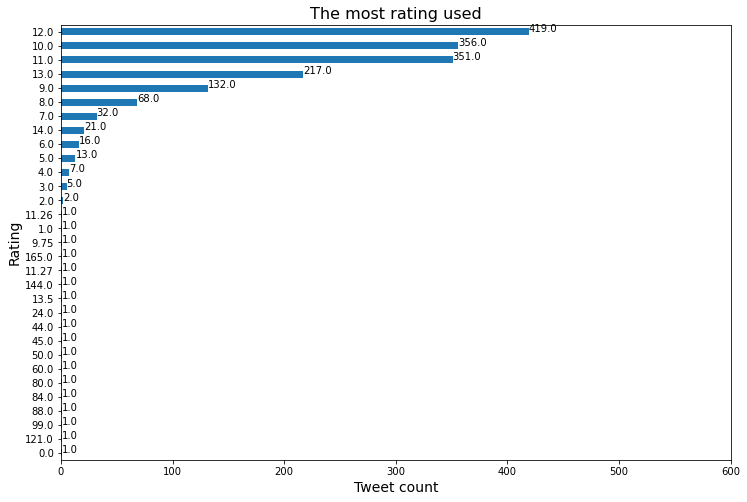

In [120]:
# get the rating count 
com_rate = df_master_clean.groupby('rating_numerator').tweet_id.count().sort_values(ascending=True)

com_rate.plot(kind='barh', figsize=[12, 8])

for index, value in enumerate(com_rate):
    plt.text(value, index, float(value))
    
plt.title('The most rating used', fontsize = 16)
plt.xlabel('Tweet count', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.xlim(0, 600)# limiting the X-axis on 600

# exporting the bar plot on png format 
plt.savefig('most_used_rate.png', bbox_inches='tight');

>- For @dog_rates page users, the most used rating for breed dog is 12 followed by 11 and 10, which mean almost all the users use a moderate rating

## Most popular dog category
Dog Types

WeRateDogs classifies dogs into one of four stages: doggo, pupper, puppo, and floof(er).Let's check how many dogs we have for each category.

In [123]:
df_master_clean.dog_type.value_counts()

Pupper     184
Doggo       65
Puppo       25
Floofer      8
Name: dog_type, dtype: int64

In [121]:
# bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#173c8c", edgecolor="k", width=width)


    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

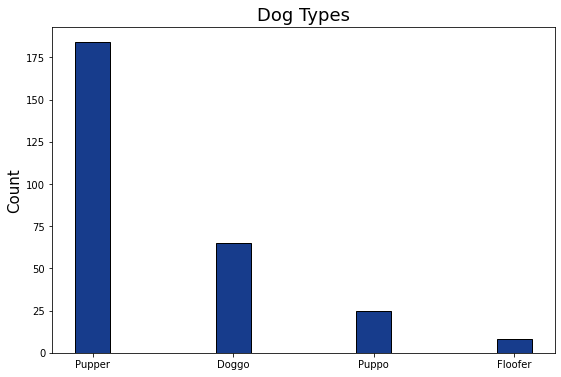

In [122]:
# plot dog types
dog_types = pd.DataFrame(df_master_clean.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25, 
         title="Dog Types",
          ylabel="Count")

>- Pupper is the most common dog category, followed by Doggo. Floofer is very rare.

## Conclusion


This project is for data wrangling of the @dog_rates Twitter account.

First and foremost, The data gathering process involved three steps, downloading TSV file, gathering data from twitter API and gathering data from json file. 

Second, using the data gathered, I assessed common data issues in the dataset and documented it for cleaning and. In the data cleaning process, I fixed all the identified issues involving structural and as well as quality issues and merged the dataframe into one. Finaly, I stored dataframe in a csv file.

Third, in the exploratory data analysis process, I explored and vizualized the data from cleaning stage, and tried to get some insights, we found strong evidence of:

The most polular, most retweeted and favorited breed dogs.

The correlation between favorited and retweeted counts is positive. The most breeds get a moderate rating between 10 and 12,
